# Análisis capacidad de vacío de la bomba BHV 10

### Autor: Andoni Pérez Segura
### Fecha: 31/05/23
### Versión: 0

## Introducción

En este documento se medirá el nivel mínimo de presión que se puede obtener con la bomba BHV 10. Para ello, se utilizará el vacuómetro [925 Micro Pirani](./PDF/925_Micropirani_Datasheet.pdf) de MKS Instruments. Además, se hará uso de una librería para poder teleocntrolar y el vacuómetro y poder representar los datos gráficamente. 

In [12]:
# Librerías necesarias de instalación

# !pip install pyserial
!pip show pyserial

Name: pyserial
Version: 3.5
Summary: Python Serial Port Extension
Home-page: https://github.com/pyserial/pyserial
Author: Chris Liechti
Author-email: cliechti@gmx.net
License: BSD
Location: d:\sw\programacion\python\wpy64-3920\python-3.9.2.amd64\lib\site-packages
Requires: 
Required-by: 


In [1]:
## Librería para el control del vacuómetro 925 Micro Pirani

class MKS925:
    def __init__(self, port, b_addr):
        self.port = port
        self.b_addr = b_addr


    ################################### READ ###################################

    #0. Reading function for final Byte detection
    def read_until(self,finish):
        buf = bytearray()
        while finish not in buf:
            buf = buf + self.port.read() 
        return buf

    #1. Read: Baud Rate (Example: 19200)
    def read_BaudRate(self):
        self.port.write(f'@{self.b_addr}BR?;FF'.encode('ascii'))  #f-string solo validas en Python3.6
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = int(data.split(b';FF')[0].decode('ascii'))
        return data

    #2. Read: Transducer communication address (001 to 253)
    def read_Address(self):
        self.port.write(f'@{self.b_addr}AD?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = int(data.split(b';FF')[0].decode('ascii'))
        return data

    #3. Read: Communication delay between receive and transmit sequence (ON / OFF)
    def read_Delay(self):
        self.port.write(f'@{self.b_addr}RSD?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = data.split(b';FF')[0].decode('ascii')
        return data
    
    #4. Read: Sensor pressure as 3 digit floating point value. (Example: 1.23E-3)
    def read_Pressure(self):
#	printf(f'@{self.b_addr}PR1?;FF')
        self.port.write(f'@{self.b_addr}PR1?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = float(data.split(b';FF')[0].decode('ascii'))
        return data
#	return 1
    
    #5. Read: Sensor pressure as 4 digit floating point value (Example: 1.23E-3)
    def read_PressureAccurate(self):
        self.port.write(f'@{self.b_addr}PR4?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = float(data.split(b';FF')[0].decode('ascii'))
        return data

    #6. Read: Setpoint relay 1 status (SET=Relay energized / CLEAR=Relay deenergized)
    def read_SetpointRelay1(self):
        self.port.write(f'@{self.b_addr}SS1?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = data.split(b';FF')[0].decode('ascii')
        return data    

    #7. Read: Setpoint relay 2 status (SET=Relay energized / CLEAR=Relay deenergized)
    def read_SetpointRelay2(self):
        self.port.write(f'@{self.b_addr}SS2?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = data.split(b';FF')[0].decode('ascii')
        return data
    
    #8. Read: Setpoint relay 3 status (SET=Relay energized / CLEAR=Relay deenergized)
    def read_SetpointRelay3(self):
        self.port.write(f'@{self.b_addr}SS3?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = data.split(b';FF')[0].decode('ascii')
        return data

    #9. Read: Setpoint 1 switch value (Example: 1.00E-2)
    def read_SetpointSwitch1(self):
        self.port.write(f'@{self.b_addr}SP1?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = float(data.split(b';FF')[0].decode('ascii'))
        return data    

    #10. Read: Setpoint 2 switch value (Example: 1.00E-2)
    def read_SetpointSwitch2(self):
        self.port.write(f'@{self.b_addr}SP2?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = float(data.split(b';FF')[0].decode('ascii'))
        return data  

    #11. Read: Setpoint 3 switch value (Example: 1.00E-2)
    def read_SetpointSwitch3(self):
        self.port.write(f'@{self.b_addr}SP3?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = float(data.split(b';FF')[0].decode('ascii'))
        return data  
    
    #12. Read: Setpoint 1 hysteresis switch value (Example: 1.10E-2)
    def read_SetpointHysteresis1(self):
        self.port.write(f'@{self.b_addr}SH1?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = float(data.split(b';FF')[0].decode('ascii'))
        return data  

    #13. Read: Setpoint 2 hysteresis switch value (Example: 1.10E-2)
    def read_SetpointHysteresis2(self):
        self.port.write(f'@{self.b_addr}SH2?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = float(data.split(b';FF')[0].decode('ascii'))
        return data 

     #14. Read: Setpoint 3 hysteresis switch value (Example: 1.10E-2)
    def read_SetpointHysteresis3(self):
        self.port.write(f'@{self.b_addr}SH3?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = float(data.split(b';FF')[0].decode('ascii'))
        return data 

    #15. Read: Setpoint 1 enable status (DIFF=Piezo differential / ABS=Absolute Piezo?????????????)
    def read_SetpointEnable1(self):
        self.port.write(f'@{self.b_addr}EN1?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = data.split(b';FF')[0].decode('ascii')
        return data 
    
    #16. Read: Setpoint 2 enable status (DIFF=Piezo differential / ABS=Absolute Piezo?????????????)
    def read_SetpointEnable2(self):
        self.port.write(f'@{self.b_addr}EN2?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = data.split(b';FF')[0].decode('ascii')
        return data 

    #17. Read: Setpoint 3 enable status (DIFF=Piezo differential / ABS=Absolute Piezo?????????????)
    def read_SetpointEnable3(self):
        self.port.write(f'@{self.b_addr}EN3?;FF'.encode('ascii'))
        data=self.read_until(b';FF').split(b'ACK')[1]
        data = data.split(b';FF')[0].decode('ascii')
        return data 



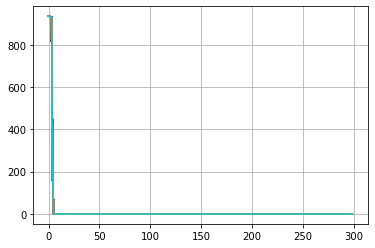

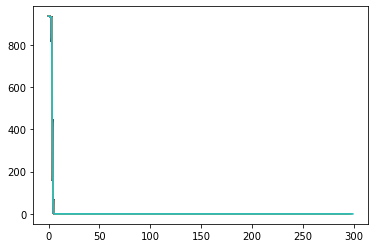

In [66]:
## Código para la lectura de datos

import serial
import time
import datetime
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display

addr = 'COM11'  # Comprobado en el admistrador de dispositivos
#addr = '/dev/ttyUSB0'  # para trabajar en linux
baud = 19200

vcm_port = serial.Serial(addr, baud,timeout=0,bytesize=8, parity='N', stopbits=1, xonxoff=0, rtscts=0)

vcm = MKS925(vcm_port, 123)
print(vcm.read_Pressure())
vacuum_pressure = vcm.read_Pressure()/100
vacio=('{:.3e}'.format(vacuum_pressure))
print(vacio)

medidas = []
time_plot = 0
fig = plt.figure()

for x in range(5*60):
    time_stamp = time.time()
    vacuum_pressure = vcm.read_Pressure()/100
    #medidas.append(vacuum_pressure)
    vacio=('{:.3e}'.format(vacuum_pressure))
    date_stamp = datetime.datetime.fromtimestamp(time_stamp).strftime('%Y-%m-%d %H:%M:%S')
    #print(str(date_stamp) + "\t" + vacio + "\t"  + str(time_stamp) + "\n")
    medidas.append(vacuum_pressure)
    time.sleep(1)
    time_plot += 1
    pl.plot(np.arange(x+1), medidas)
    pl.grid()
    display.clear_output(wait=True)
    display.display(pl.gcf())
    pl.grid()
""""
plt.plot(np.arange(len(medidas)), medidas)
plt.grid()
plt.show()
"""
vcm_port.close()

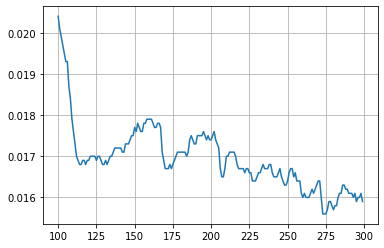

In [90]:
zoom = 100

plt.plot(zoom + np.arange(len(medidas)-zoom), medidas[zoom:len(medidas)])
plt.grid()
plt.show()

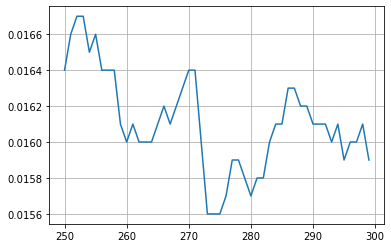

In [86]:
zoom = 250

plt.plot(zoom + np.arange(len(medidas)-zoom), medidas[zoom:len(medidas)])
plt.grid()
plt.show()

In [65]:
vcm_port.close()

In [93]:
medidas_referencia_bomba = medidas[zoom:len(medidas)]

In [94]:
%store medidas_referencia_bomba

Stored 'medidas_referencia_bomba' (list)
